In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preamble {-}

The file air.2m.mon.mean.nc is monthly mean 2m air temperatures from the NCEP/DOE reanalysis 2. Note that the latitudes are not equally spaced.

The file 1850-2022.csv are the annual and global mean air temperature anomalies from the NOAA GlobalTemp dataset. The reference period is 1971-2000.

The data is all in ClimateDynamicsCourse/data/ExampleLabData/

# Hints {-}

- I've minimized the cells to show you what it will look like when you submit the notebook. However you will probably want to expand the cells to look at what is there.

- To calculate a global mean you will need to area weight the data. If each grid cell has a size $dr_x$ radians in the longitude direction and $dr_y$ radians in the latitude direction then the solid angle element of the cell is $$ dA = dr_x dr_y \cos(r_y)$$ and the area weighted mean of f is

$$ \overline{f} = \frac{\sum_{ij}\, f_{ij}\, dA_{ij}}{\sum_{ij} \, 1 \,dA_{ij}} $$
 

- The temperature anomaly of something is $$ T' = T - \overline{T} $$

How would create consistent anomalies for 2 different datasets?

# Questions {-}

## 1. Analysing the 2m air temperature dataset {-}

### 1.1 {-}
- Load the datafile data/air.2m.mon.mean.nc
- What variables does it contain?

### 1.2 {-}
- Make a map of annual mean air temperature for 1979

### 1.3 {-}
- What pattern(s?) can you see in the plot?

## 2. Comparison with the NOAA Global temperature dataset {-}

### 2.1 {-}
- Load the datafile data/global/1850-2022.csv.
- What is the resolution of that data?
-What does it represent?

### 2.2 {-}
- Describe how you will calculate the global temperature anomalies from both datasets and ensure that they are consistent.

### 2.4 {-}
- Calculate and plot the global annual mean temperature anomalies of both datasets. 

# Answers {-}

### 1.1 {-}
- The datafile contains 2m surface temperature from the NCEP Reanalysis.

### 1.2 {-}
-  **Figure 1** shows the annual mean surface air temperature from the NCEP Reanalysis

### 1.3 {-}
 The 3 patterns that I see are 
 1) there is a clear north to equator to pole temperature gradient
 2) the south pole is colder than the north pole
 3) 2m Temperatures are cooler over high topography.

### 2.1 {-}
- The data is annually averaged.
- The data are global temperature anomalies relative to a fixed averaging period.

### 2.2 {-}
- Since the NOAA Global temp data are annually averaged temperature anomalies we need to calculate the global mean, annually averaged temperature anomalie for both NOAA Global temp data and the NCEP reanalysis data.
- To do this we will compute the 1980-2000 average and subtract it from both time series in order to make sure that we are comparing consistent anomalies.

### 2.3 {-}
-  Figure 2 shows the results. The match between the anomalies shows that we are calculating the anomalies consistently.


# Workbook Cells {-}

In [4]:
# lets load a netcdf file into xarray as a dataset and take a look at it

ds=xr.open_dataset('../data/ExampleLabData/air.2m.mon.mean.nc')

ds

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 540, nbnds: 2, level: 1)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-12-01
  * level      (level) float32 2.0
Dimensions without coordinates: nbnds
Data variables: (12/16)
    time_bnds  (time, nbnds) datetime64[ns] ...
    dlwrf      (time, lat, lon) float32 ...
    ulwrf      (time, lat, lon) float32 ...
    dswrf      (time, lat, lon) float32 ...
    uswrf      (time, lat, lon) float32 ...
    lhtfl      (time, lat, lon) float32 ...
    ...         ...
    prate      (time, lat, lon) float32 ...
    cprat      (time, lat, lon) float32 ...
    runof      (time, lat, lon) float32 ...
    nlwrf      (time, lat, lon) float32 ...
    nswrf      (time, lat, lon) float32 ...
    netsrf     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

Text(0.5, 0.98, 'Figure 1')

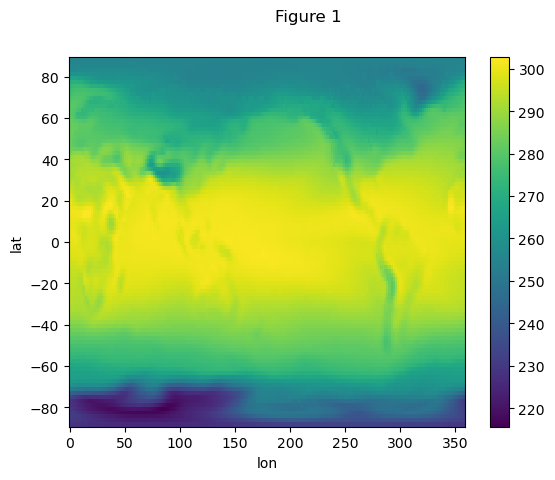

In [ ]:
# lets take the first year of data and make a mean and then plot it 

# the mean on its own still has an axis for time even after taking the mean
# use squeeze to get rid of this.
tmean = ds.air.isel(time=slice(0,12)).mean(dim='time').squeeze()
lon = ds.lon
lat = ds.lat

figure1 = plt.figure()
plt.pcolor(lon,lat,tmean)
plt.colorbar()
plt.xlabel('lon')
plt.ylabel('lat')
figure1.suptitle('Figure 1')

In [ ]:
# lets get some data from from a different dataset and compare this to what we have.
# unfortunately that data is in a CSV file so we have to load using pandas

df = pd.read_csv('../data/NOAAGlobalTempAnomalies.csv')

# the resulting object is a pandas dataframe, kind of similar to an excel spreadsheet but in python
print(df)

# we can get data out a pandas data frame using the values attribute

T_analysis = df.Anomaly.values


     Year  Anomaly
0    1850    -0.16
1    1851    -0.08
2    1852    -0.09
3    1853    -0.10
4    1854    -0.09
..    ...      ...
168  2018     0.86
169  2019     0.98
170  2020     1.01
171  2021     0.86
172  2022     0.91

[173 rows x 2 columns]


shape of dA: (94,)
check sum area elements: 1.0002316823634434


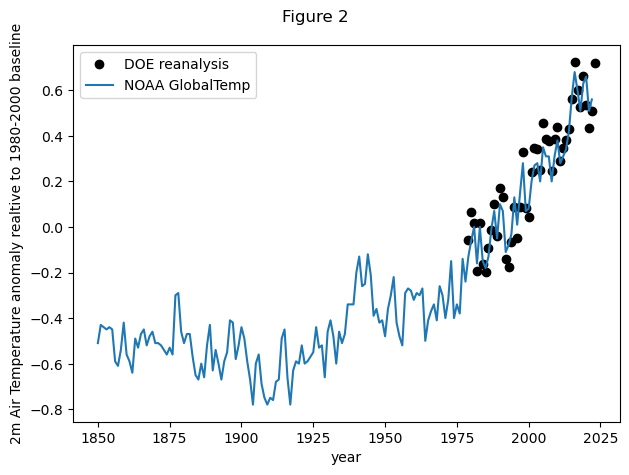

In [ ]:
# make some weights to calculate the global average 
# these are "solid angle elements": d(lon in rads)*d( lat in rads )*cos(lat in rads) 

# get the lon and lat data
lon = ds.lon.data
lat = ds.lat.data

# convert these to radians
rx = lon*np.pi/180.
ry = lat*np.pi/180.

# since the grid is constant in lon so can use a single rad element 
drx = rx[1]-rx[0]

# this is a little trick
# since the grid isn't evenly spaced on lat, going to find the latitudes at the points halfway between the grid points.
# then calculate dry at at the grid points by using the differences at the half points  
ryh = np.hstack([np.pi/2,.5*(ry[1:]+ry[:-1]),-np.pi/2])
dry = ryh[:-1]-ryh[1:]
cosy = np.cos(ry)

# this is the area element, but look at the shape:
dA = cosy*dry*drx
print('shape of dA:',dA.shape)

# dA is a 1d array, so we can broadcast it to 2d using np.meshgrid 
# we don't need the lon values, so just redirect those to null output
__,dA2 = np.meshgrid(lon,dA)

#get the solide angle elements by multiplying the two together
#dA = drad*dsin2

# check to make sure that our solid angle elements sum to 4pi 
print('check sum area elements:', dA2.sum()/(4*np.pi))

# now we can calculate the global average temperature

# find the weight that each cell contributes to the global average
W = dA2/dA2.sum()

# use the weights to take the global mean
air2m_gm = (ds.air * W).sum(dim=(('lon','lat')))

# there is a problem here
# we cannot just take an annual mean of monthly data
# because each month has a different number of days
# so we need to weight our time mean by how many days are in each month


# leap years are very annoying to handle 

# find out how many days are in each month 

days_in_month = ds.time.dt.days_in_month

days_in_year = np.zeros(len(days_in_month)) + 365.0
for i in range(0,len(days_in_year)):
    if ds.time[i].dt.is_leap_year:
        days_in_year[i]+=1

mon_w = days_in_month/days_in_year

air2m_gm_am = (air2m_gm*mon_w).groupby(ds.time.dt.year).sum()

# lets try and plot the two of them together. 
# because the NOAA GlobalTemp data is as an anomaly, we need to subtract a base state from both of them. 
# lets use 1980-2000 as our base state

Tanom1 = air2m_gm_am - air2m_gm_am.sel(year=slice(1980,2000)).mean(dim='year')
Tanom2 = T_analysis - T_analysis[130:151].mean()

# make a time array for the reanalsyis data using decimal years to match the analysis data
#t0=np.arange(1979,2024-1/12-0.001,1/12)

plt.plot(np.arange(1979,1979+45,1),Tanom1,'ko',label='DOE reanalysis')
plt.plot(df.Year,Tanom2,label='NOAA GlobalTemp')

plt.ylabel('2m Air Temperature anomaly realtive to 1980-2000 baseline')
plt.xlabel('year')

plt.legend()

plt.suptitle('Figure 2')

plt.tight_layout()